In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import matplotlib.style as style
style.use('ggplot')

%matplotlib inline

In [84]:
# Load joined dataframe
df = pd.read_csv('csv/metadata_text_merged_cleaned.csv')
# Remove rows with empty text column for now
df = df.dropna(subset=['text'])

# Search and Visualization of Term Occurrences:
This tool enables you to visualize changes in the frequency of term occurrences in this corpus over space and time.

Usage: Modify what's within the brackets next to the variable named "terms" below. Click on the cell below and press Shift + Return in order to run the cell (alternatively, click on the cell below and select Select Cell -> Run Cells in the menu above).

('Filtering for term:', ['pirate', 'pirates'], '(55 total letters)')
First 5 rows of filtered dataframe:


,UID,Vol,LetterNo,Sender,Place Sent From,Ship Name,Place Going To,Date,Boat/Fort,RAC/Other Nation,text,Year,Month,text_cleaned,text_cleaned_dealiased,filtered
4,5,1,5,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,27,Fort,RAC,Just now arrived a canoe from Axim whoe inform...,1683.0,6.0,arrived canoe axim whoe informed us dutch cope...,arrived canoe axim who informed us dutch copem...,True
5,6,1,6,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,30,Fort,RAC,Your Worships of the 28th instant I have per t...,1683.0,6.0,worships 28th instant per 9 hand canoe goods m...,worships 28th instant per 9 hand canoe goods m...,True
6,7,1,7,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,02,Fort,RAC,This is to acquaint your Worship that just now...,1683.0,7.0,acquaint worship arrived dutch interloper dick...,acquaint worship arrived dutch interloper dick...,True
7,8,1,8,Mark Bedford Whiting,Sekondi,NaN,Cape Coast Castle,09,Fort,RAC,Your Worships letter per the 9 hand canoe is c...,1683.0,7.0,worships letter per 9 hand canoe come hand 130...,worships letter per 9 hand canoe come hand 130...,True
350,351,1,351,Richard Thelwall,Anomabu,NaN,Cape Coast Castle,29,Fort,RAC,"Yesterday I received yours, and immediately de...",1683.0,6.0,yesterday received immediately delivered lette...,yesterday received immediately delivered lette...,True


UIDs of letters containing the term:
[   5    6    7    8  351  370  457  494  495  557  558  560  561  562
  632  633  636  637  639  646  647  648  649  655  656  663  664  723
  751  754  755  756  757  784  807  809  892  936  938  941 1024 1028
 1348 1471 1472 1538 1562 1584 1588 1617 1620 1635 1636 1817 3055]


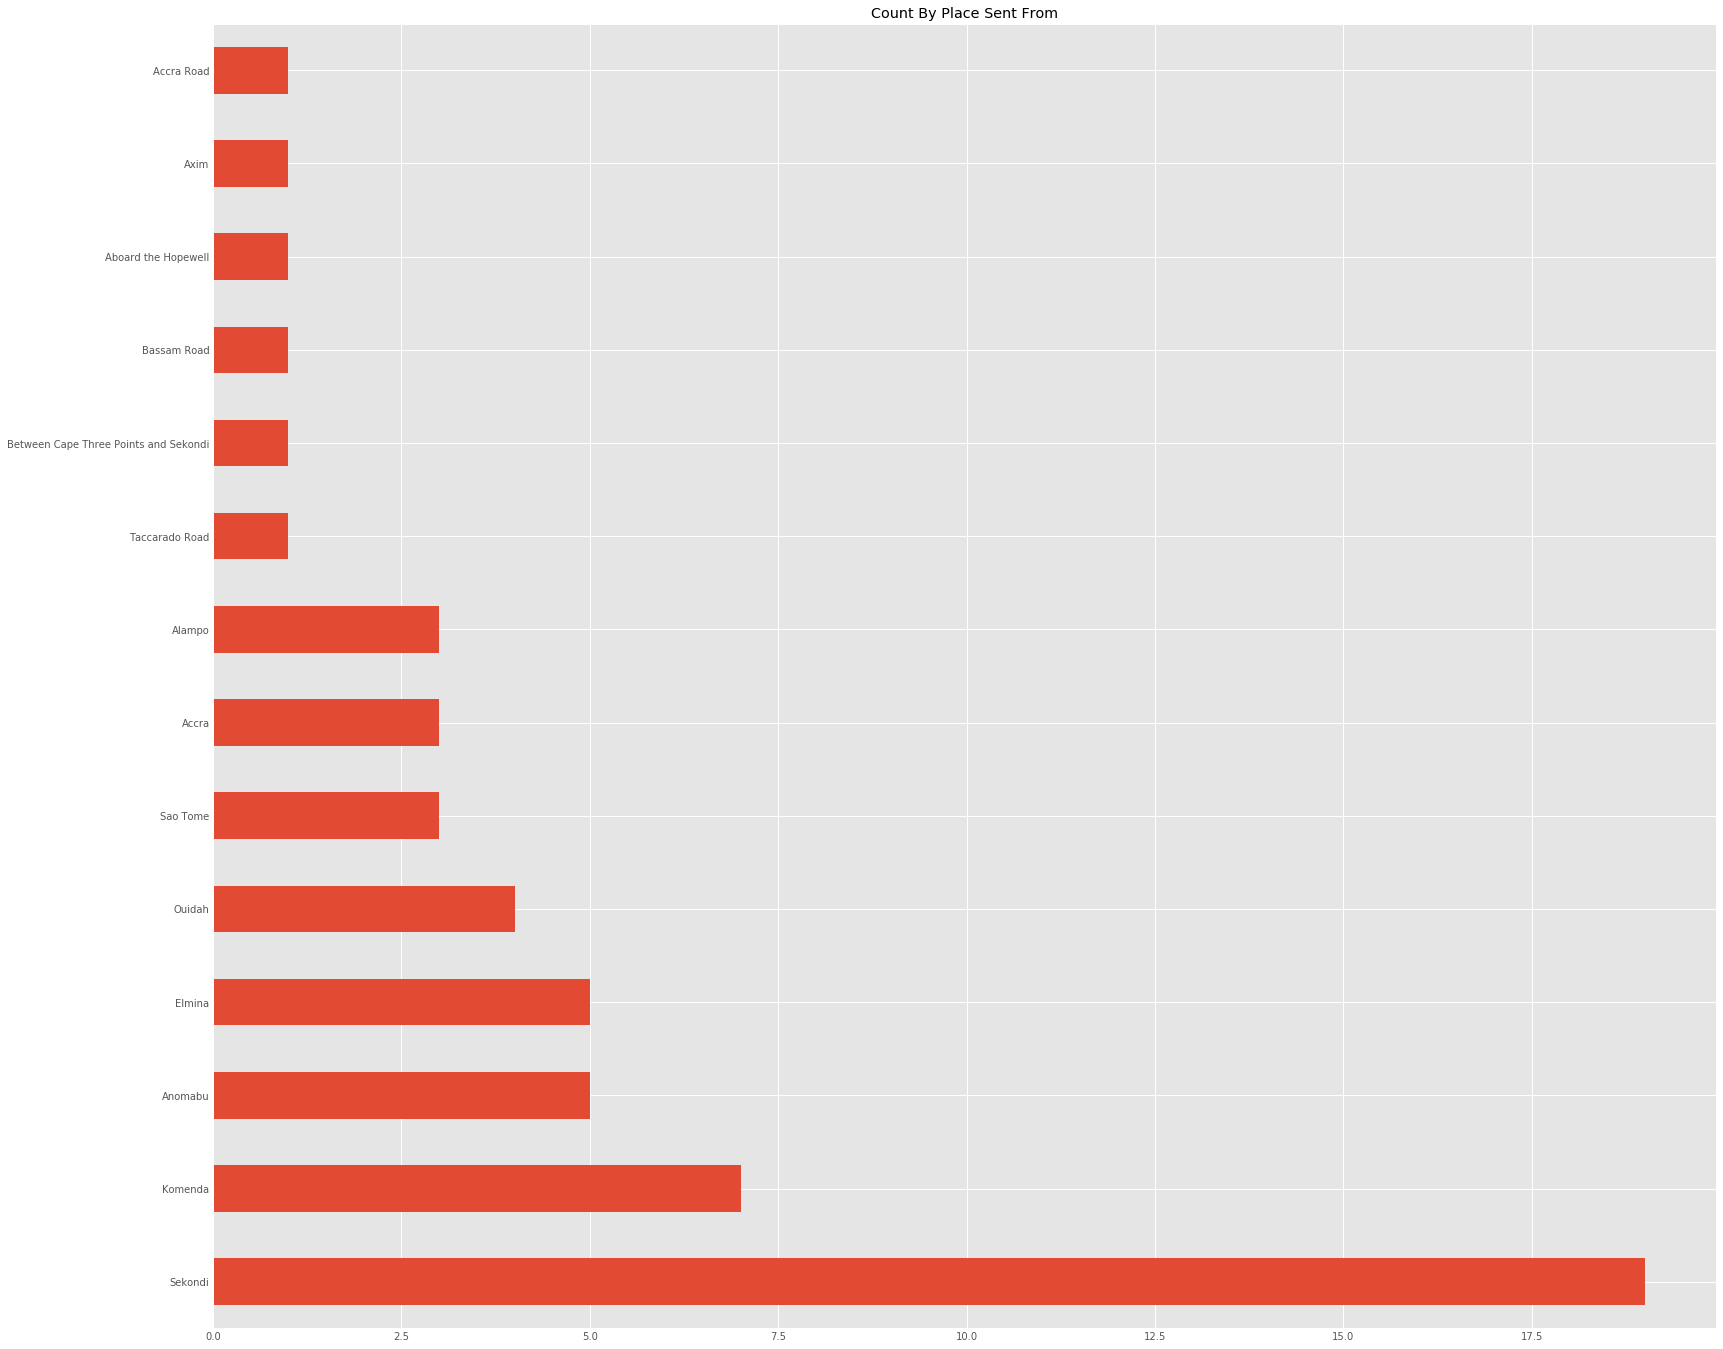

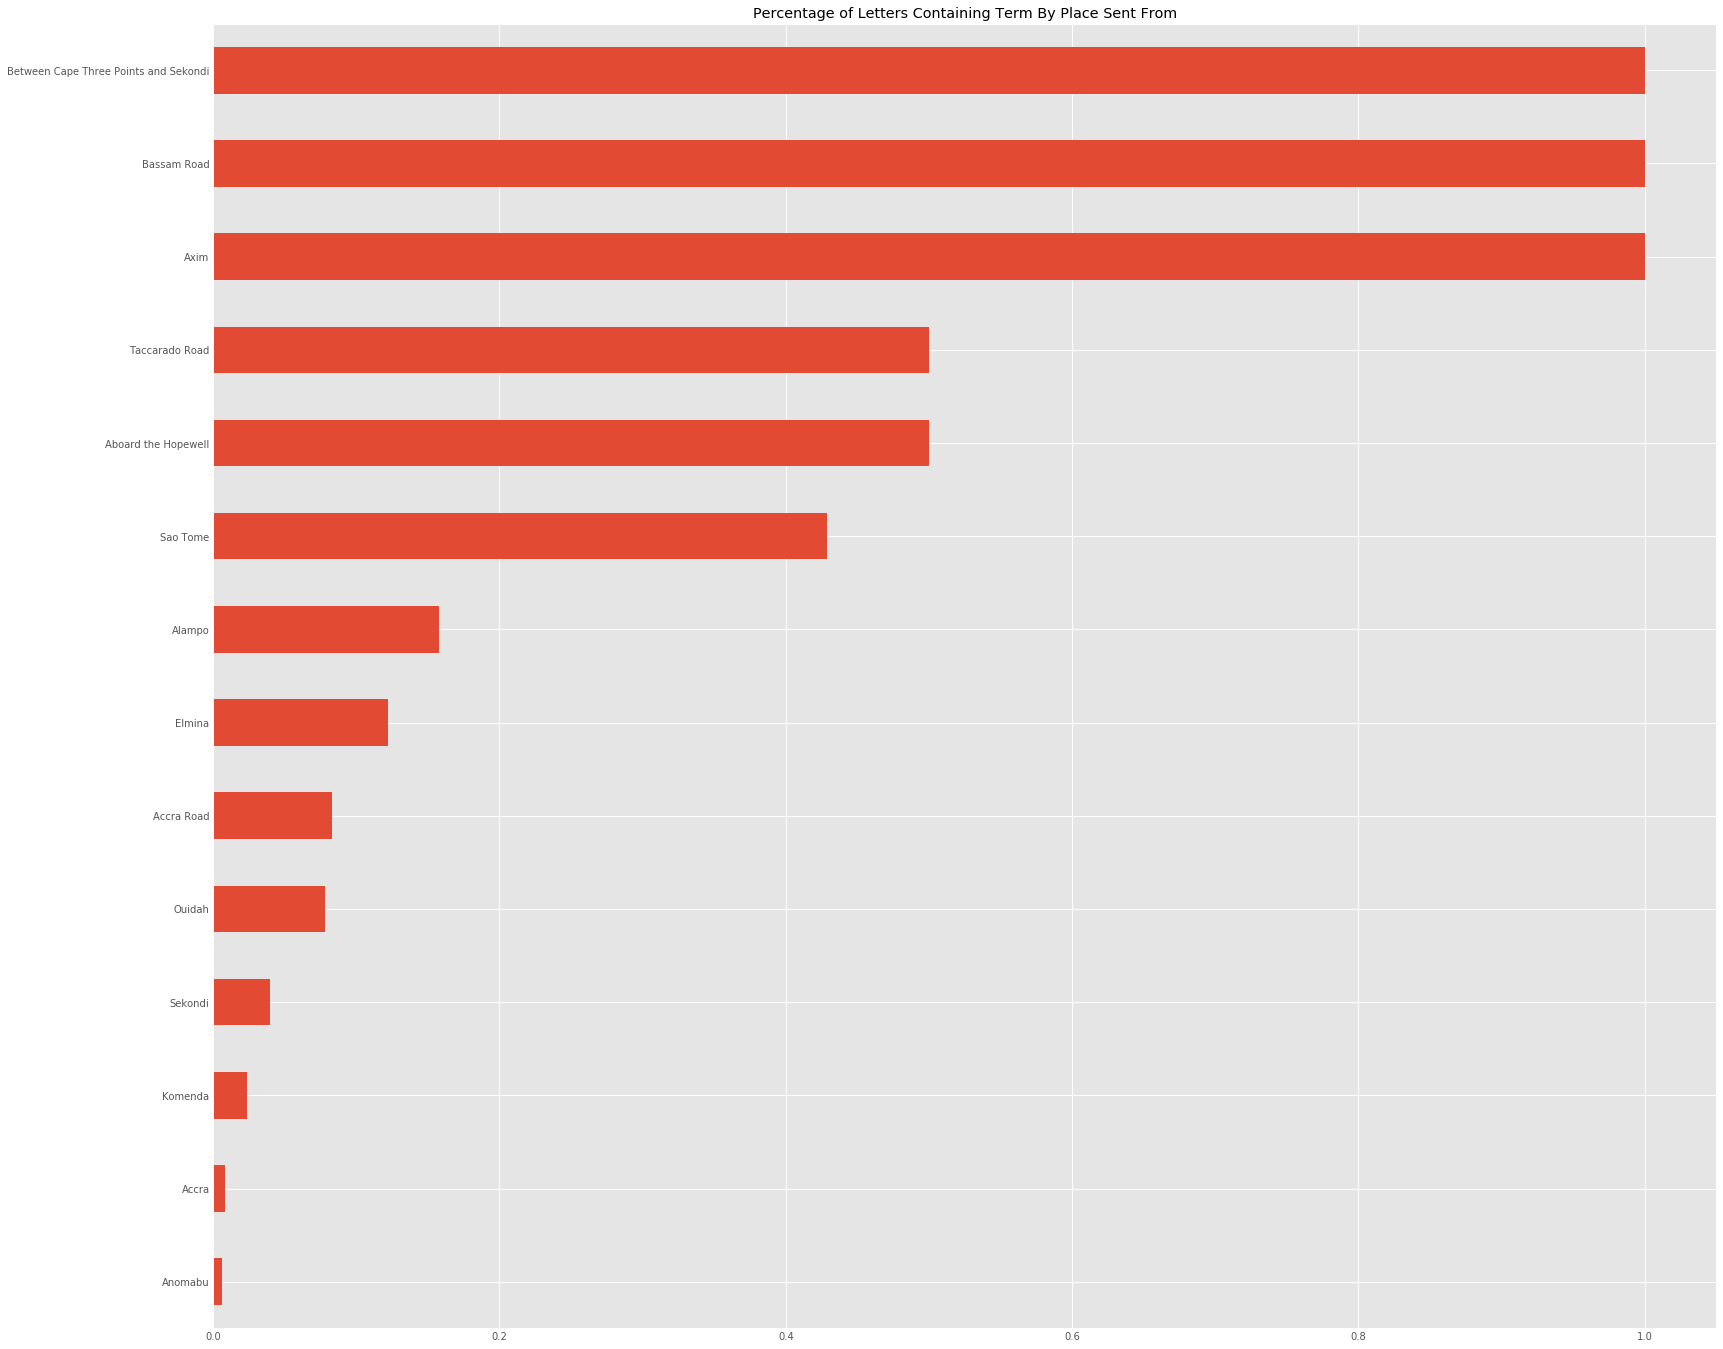

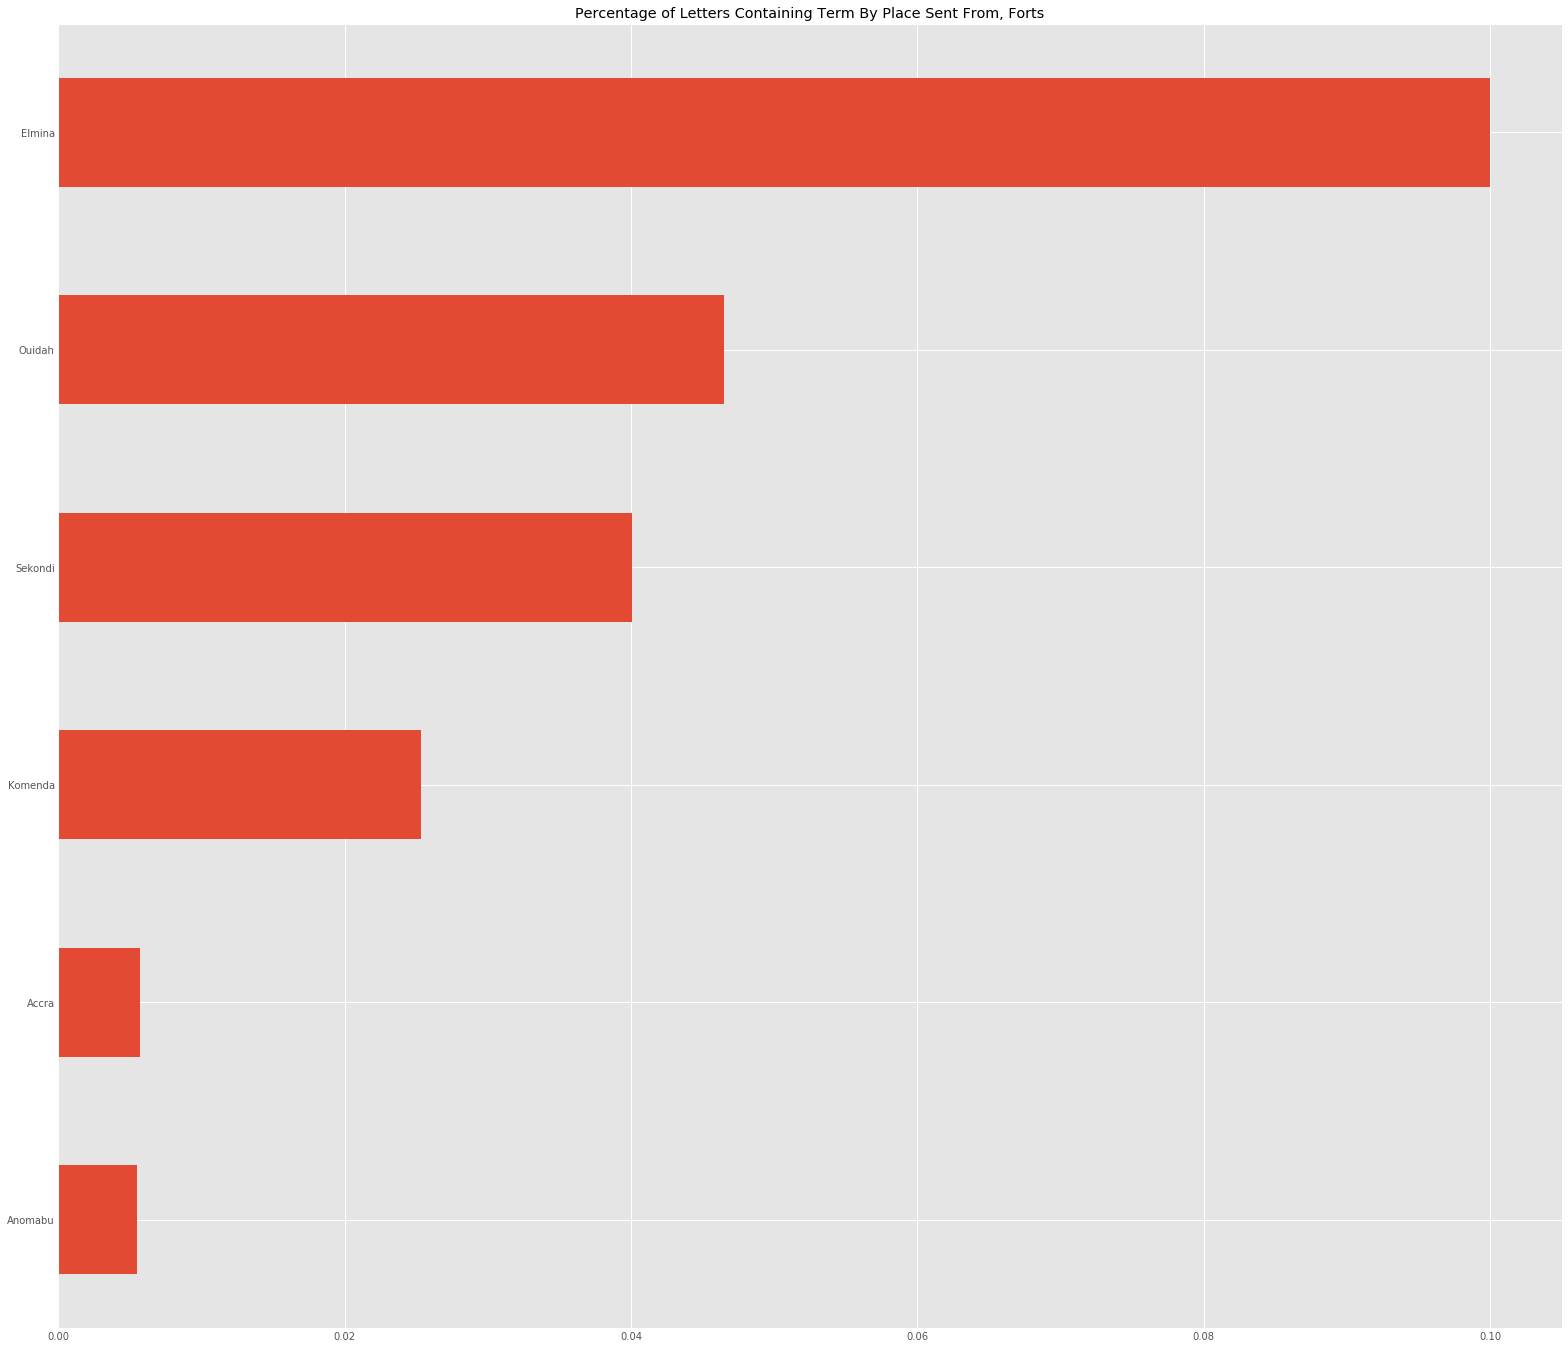

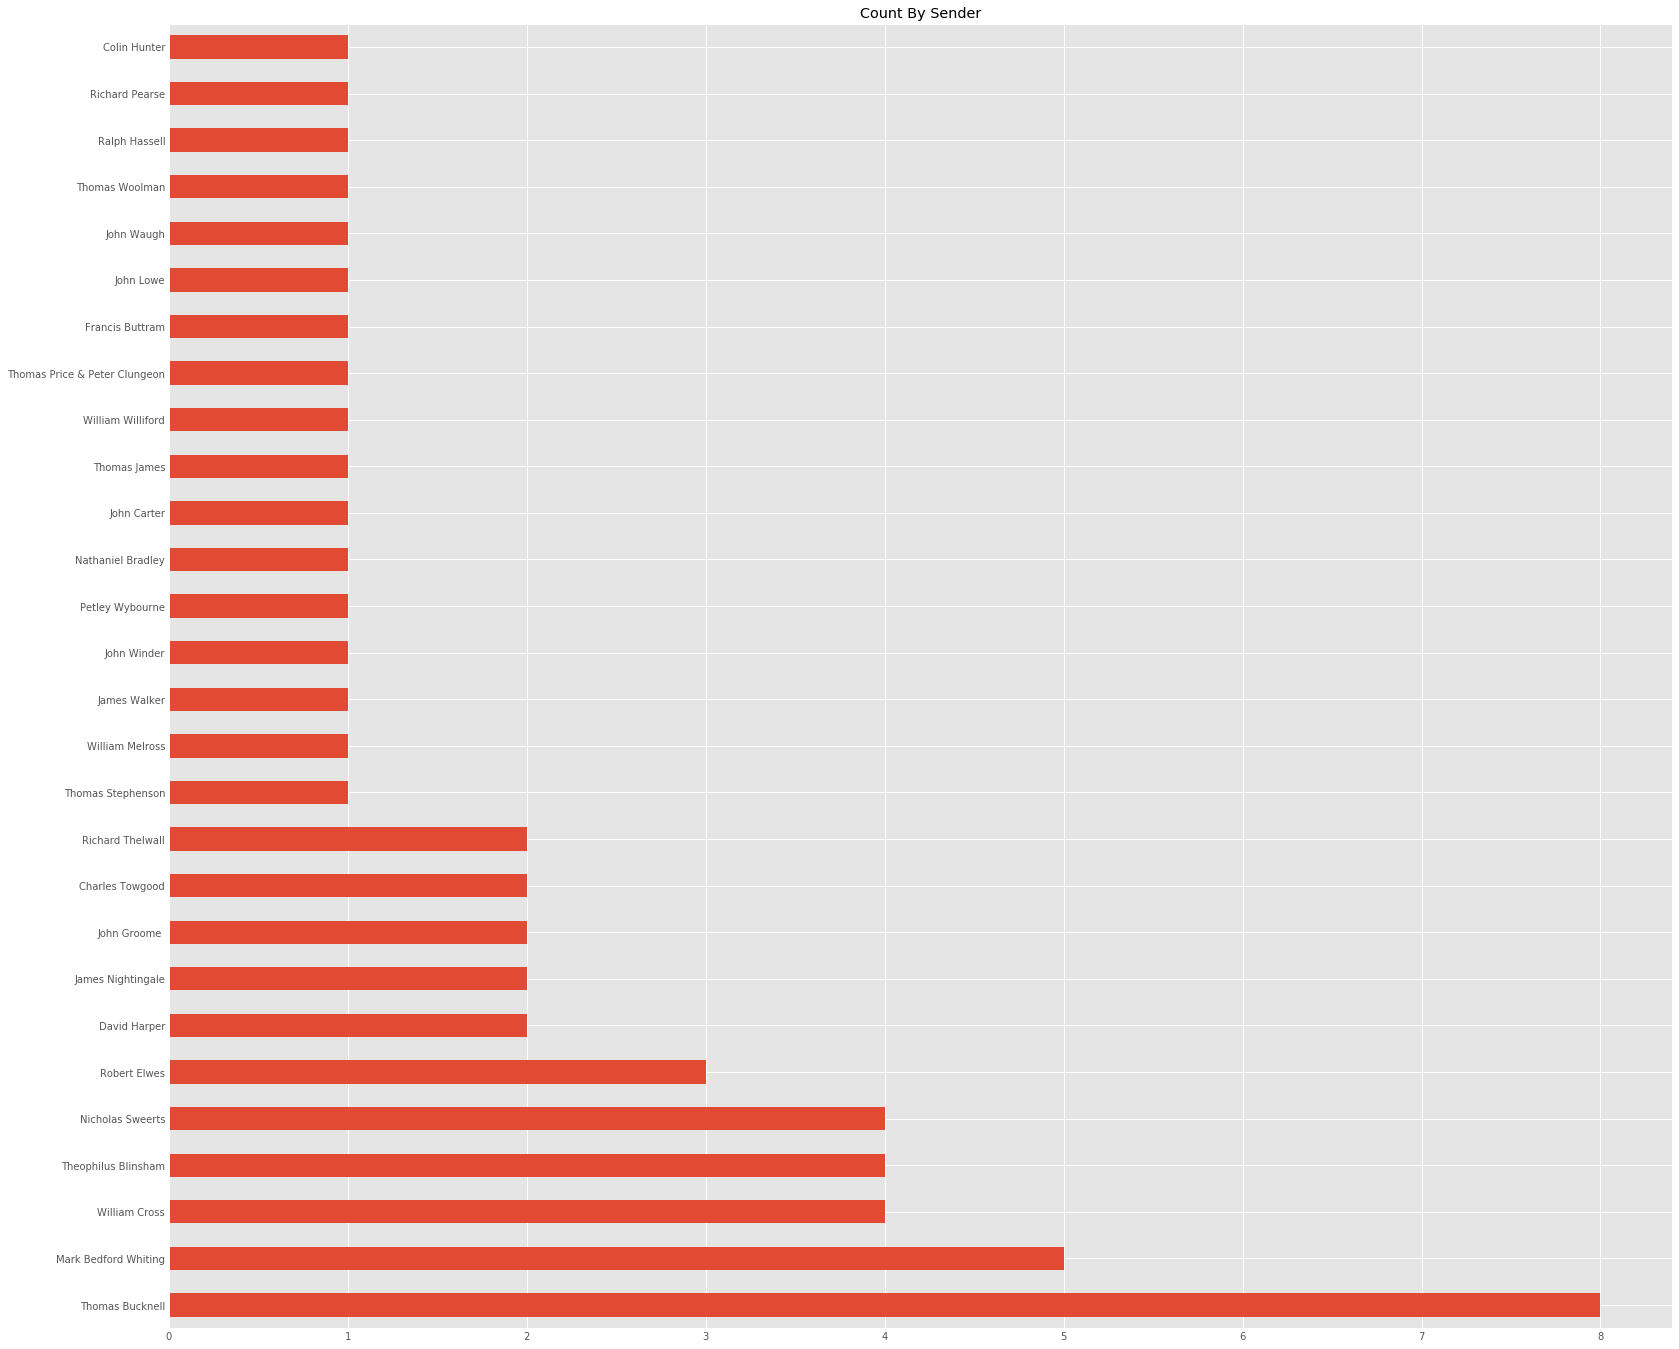

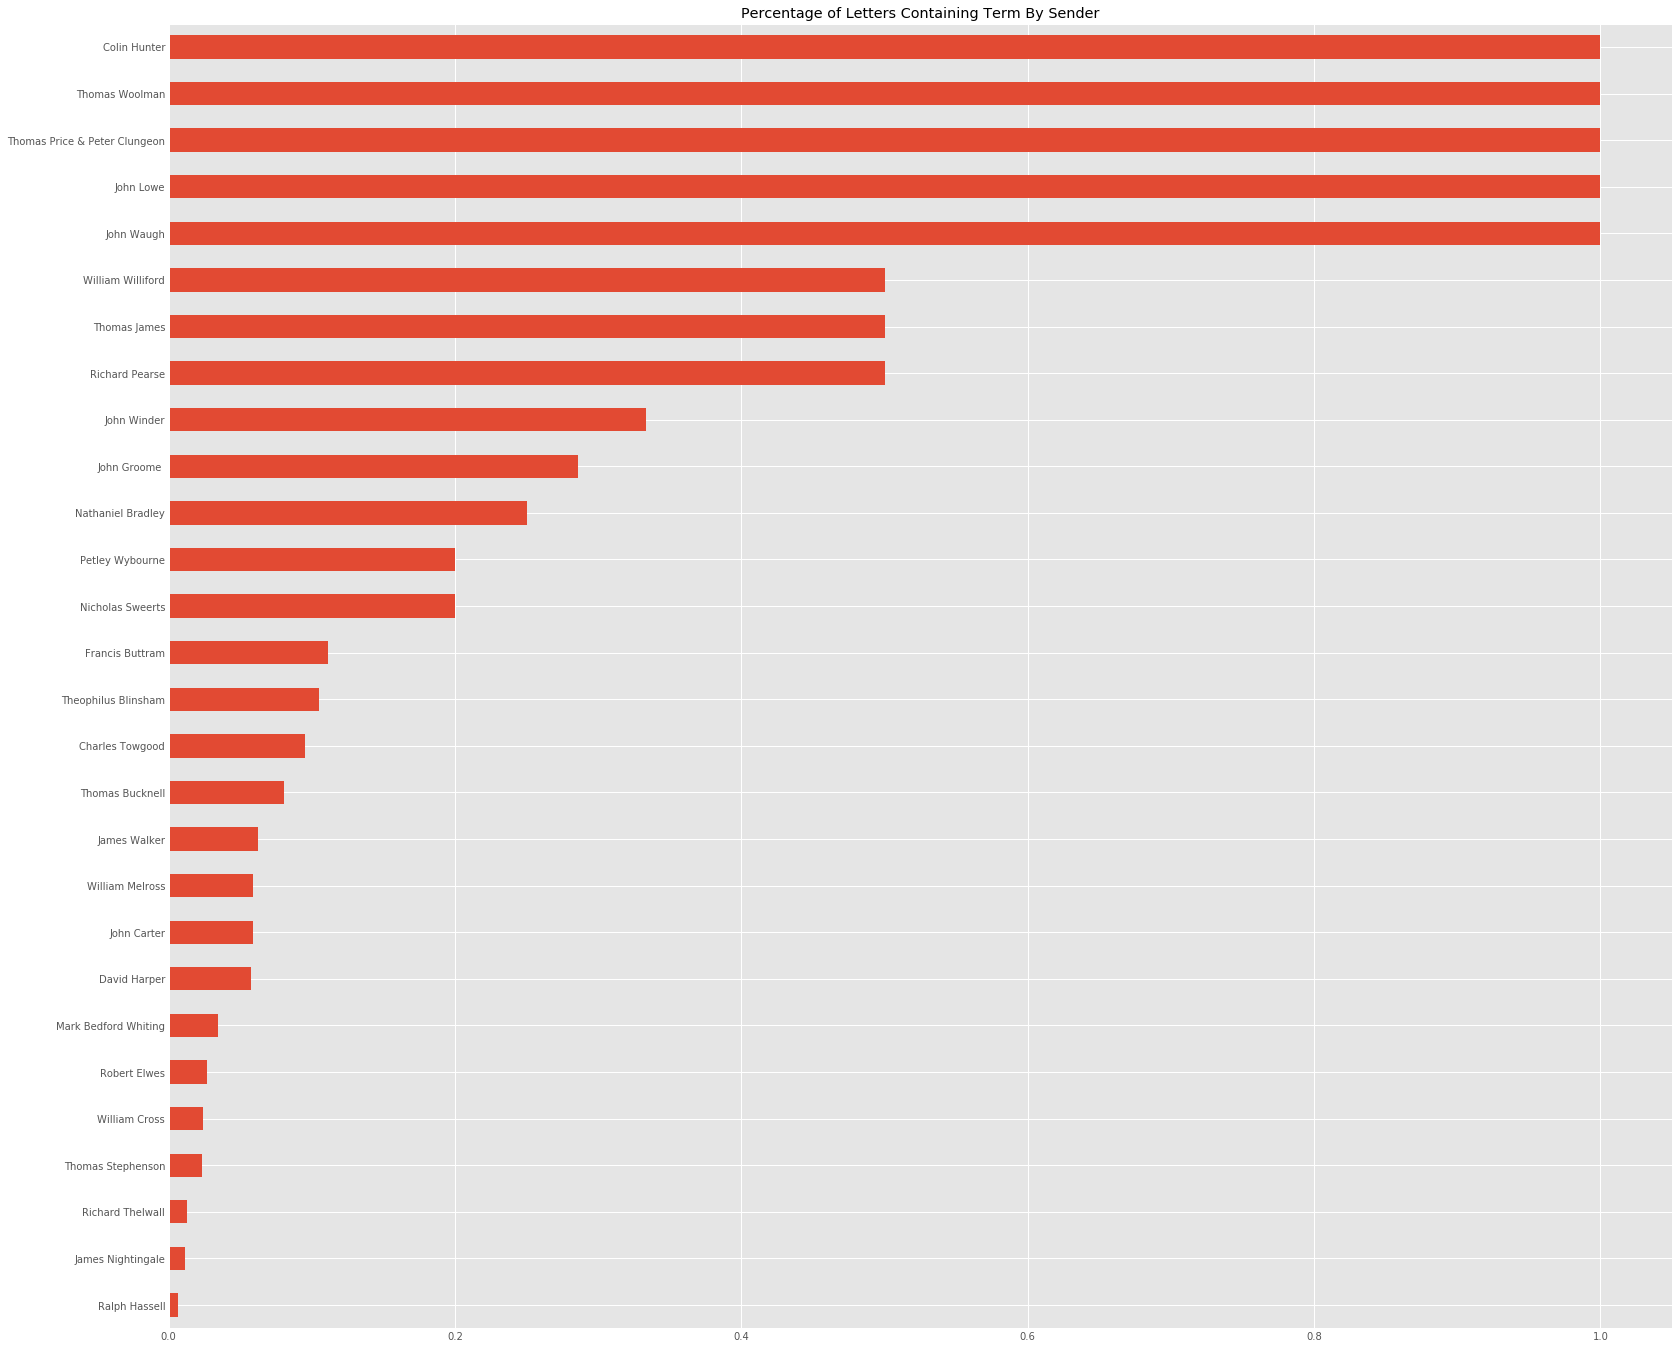

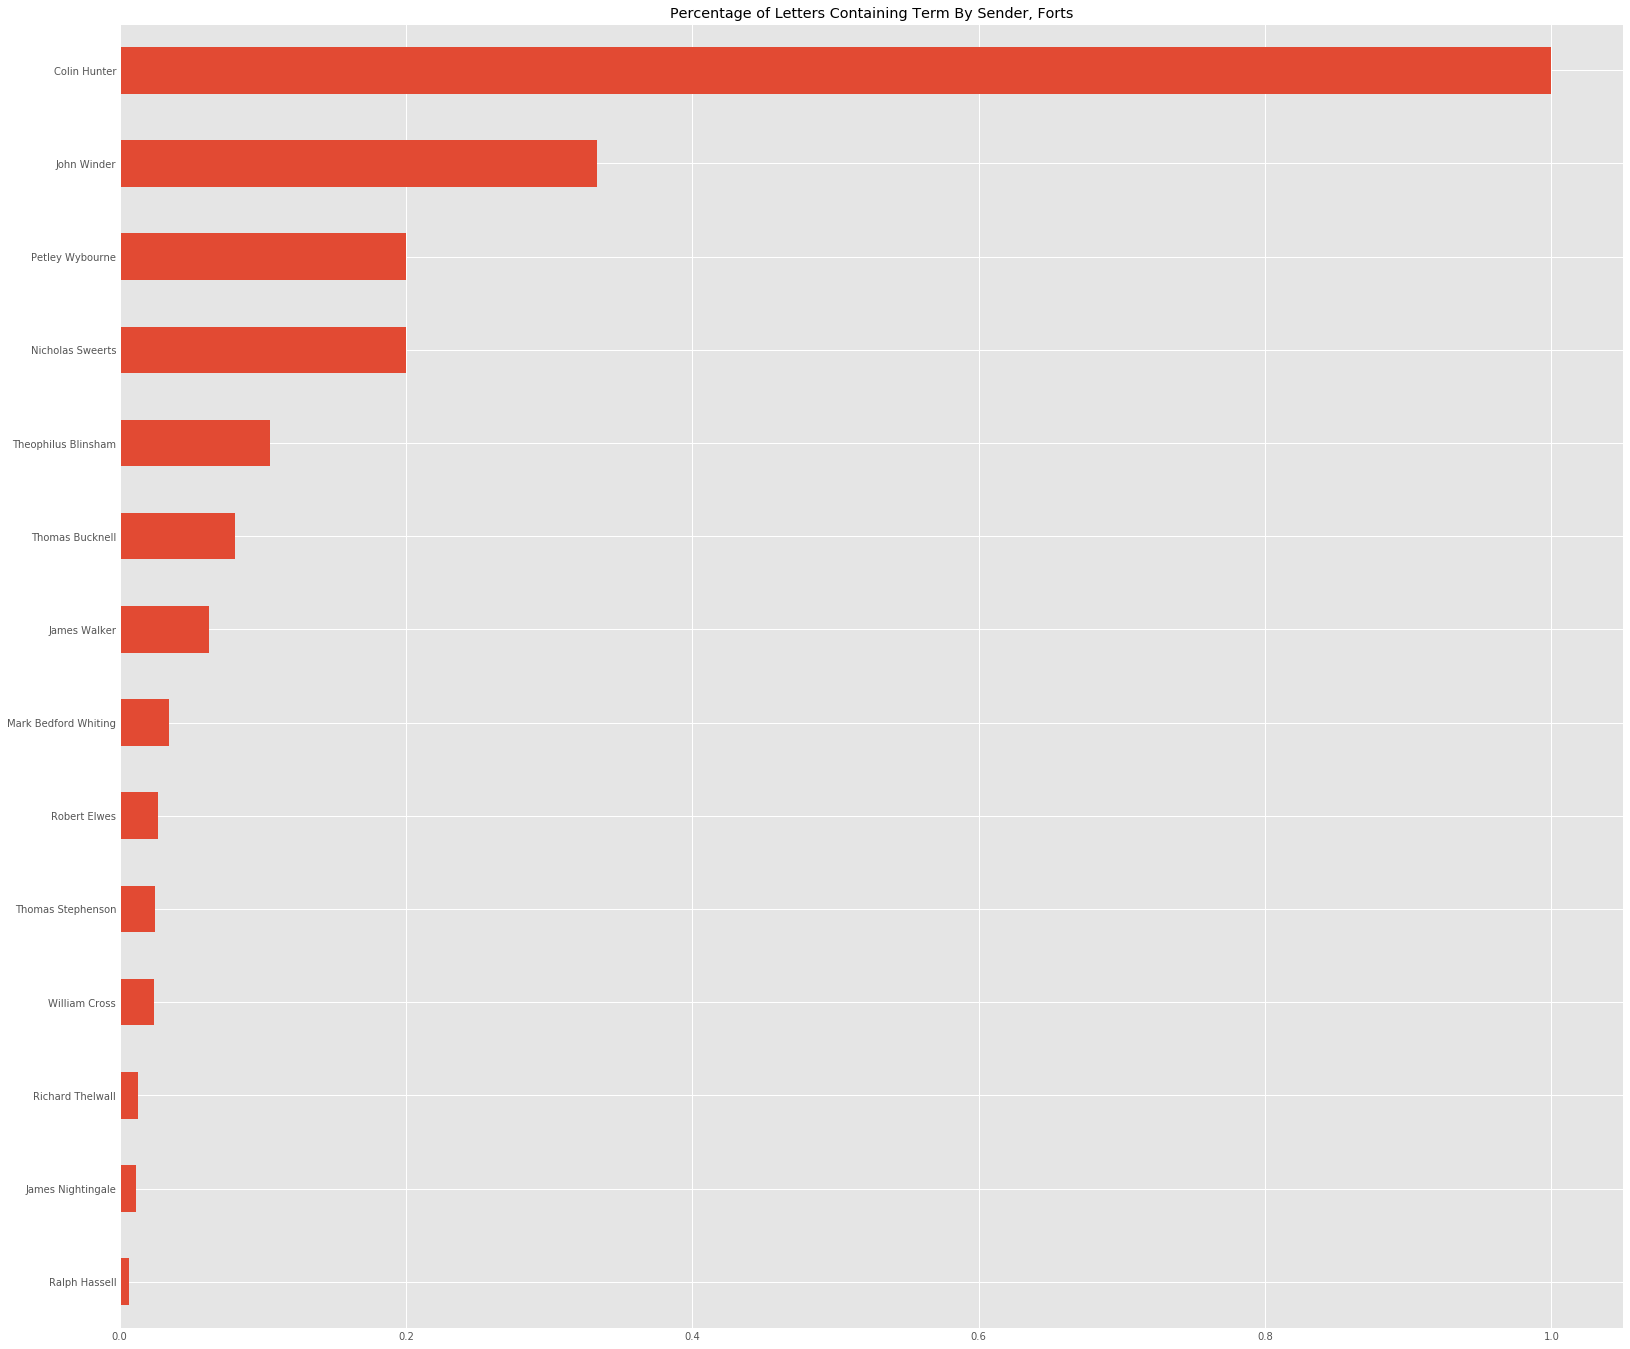

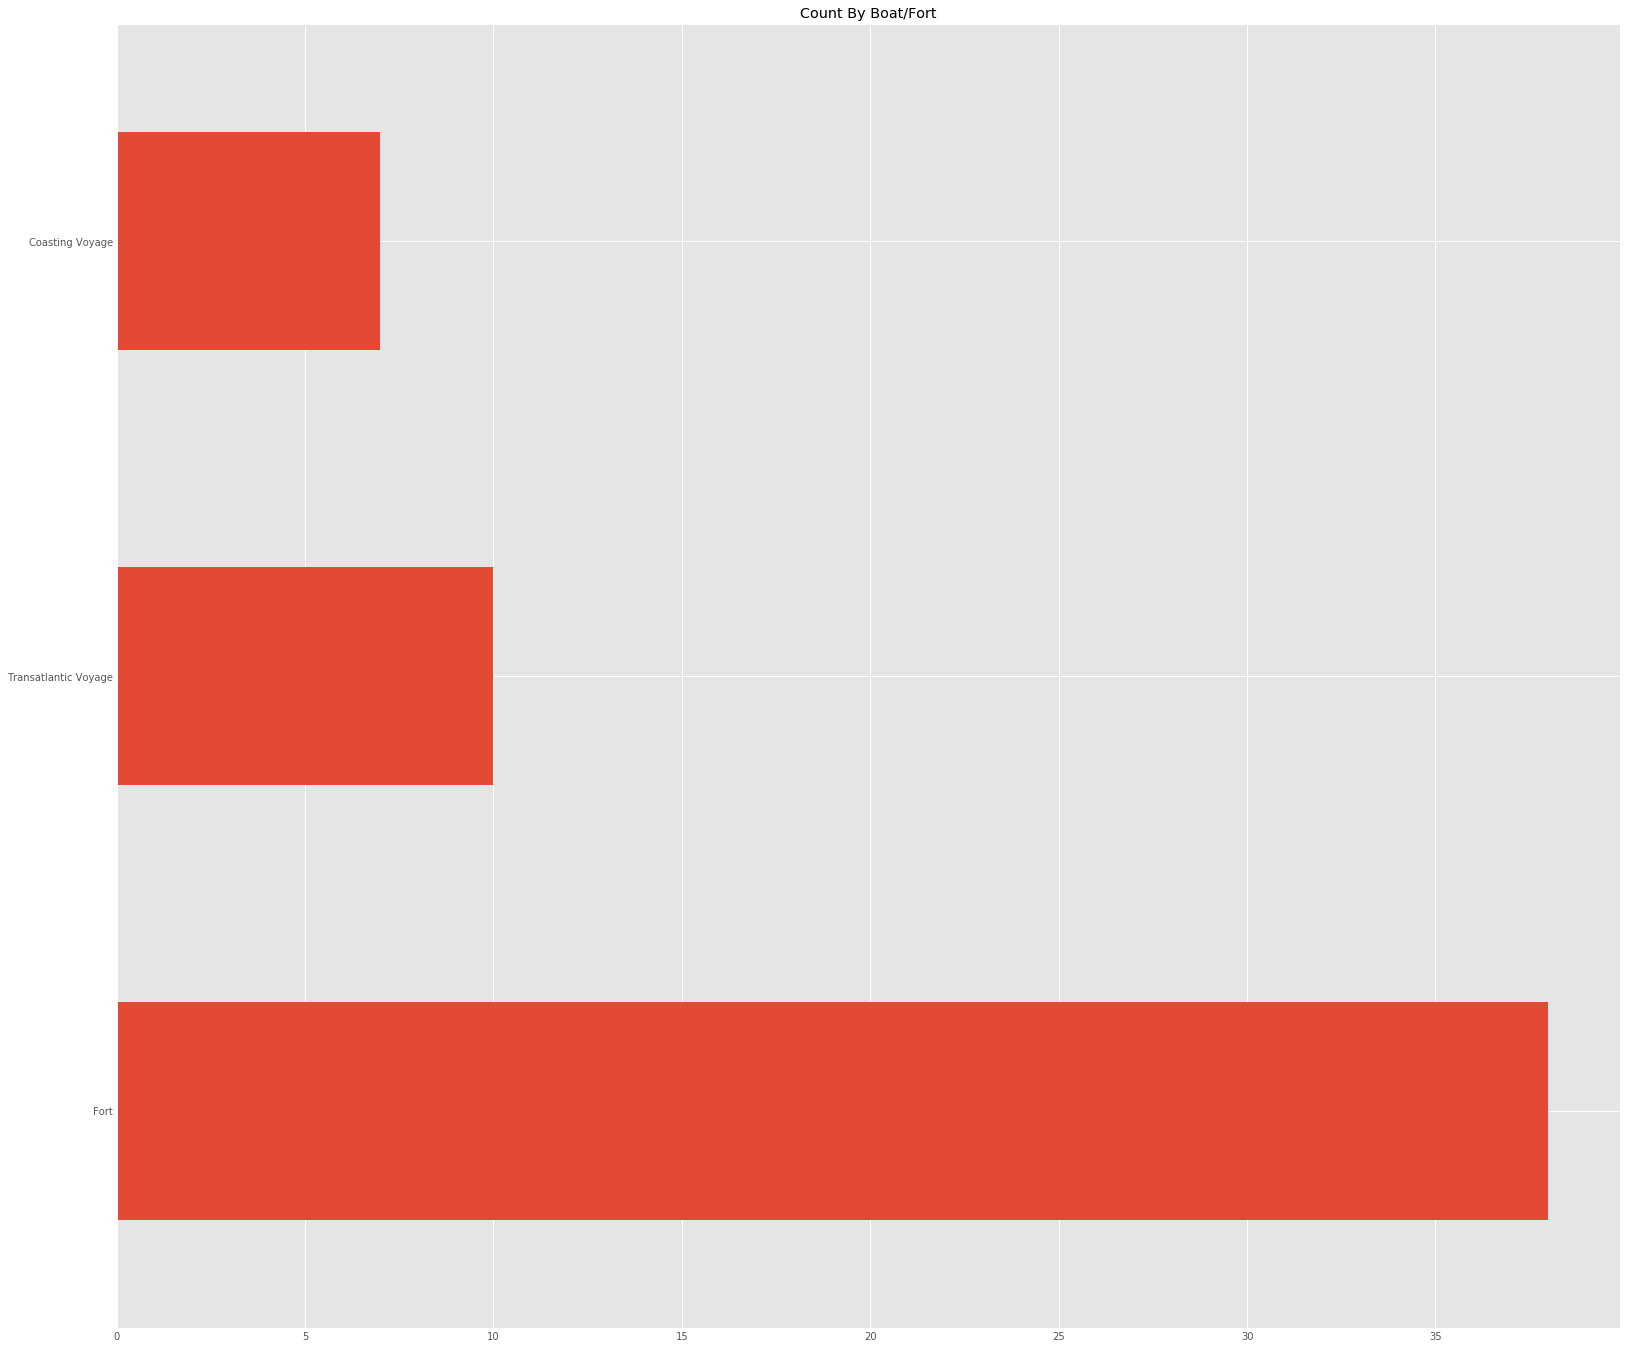

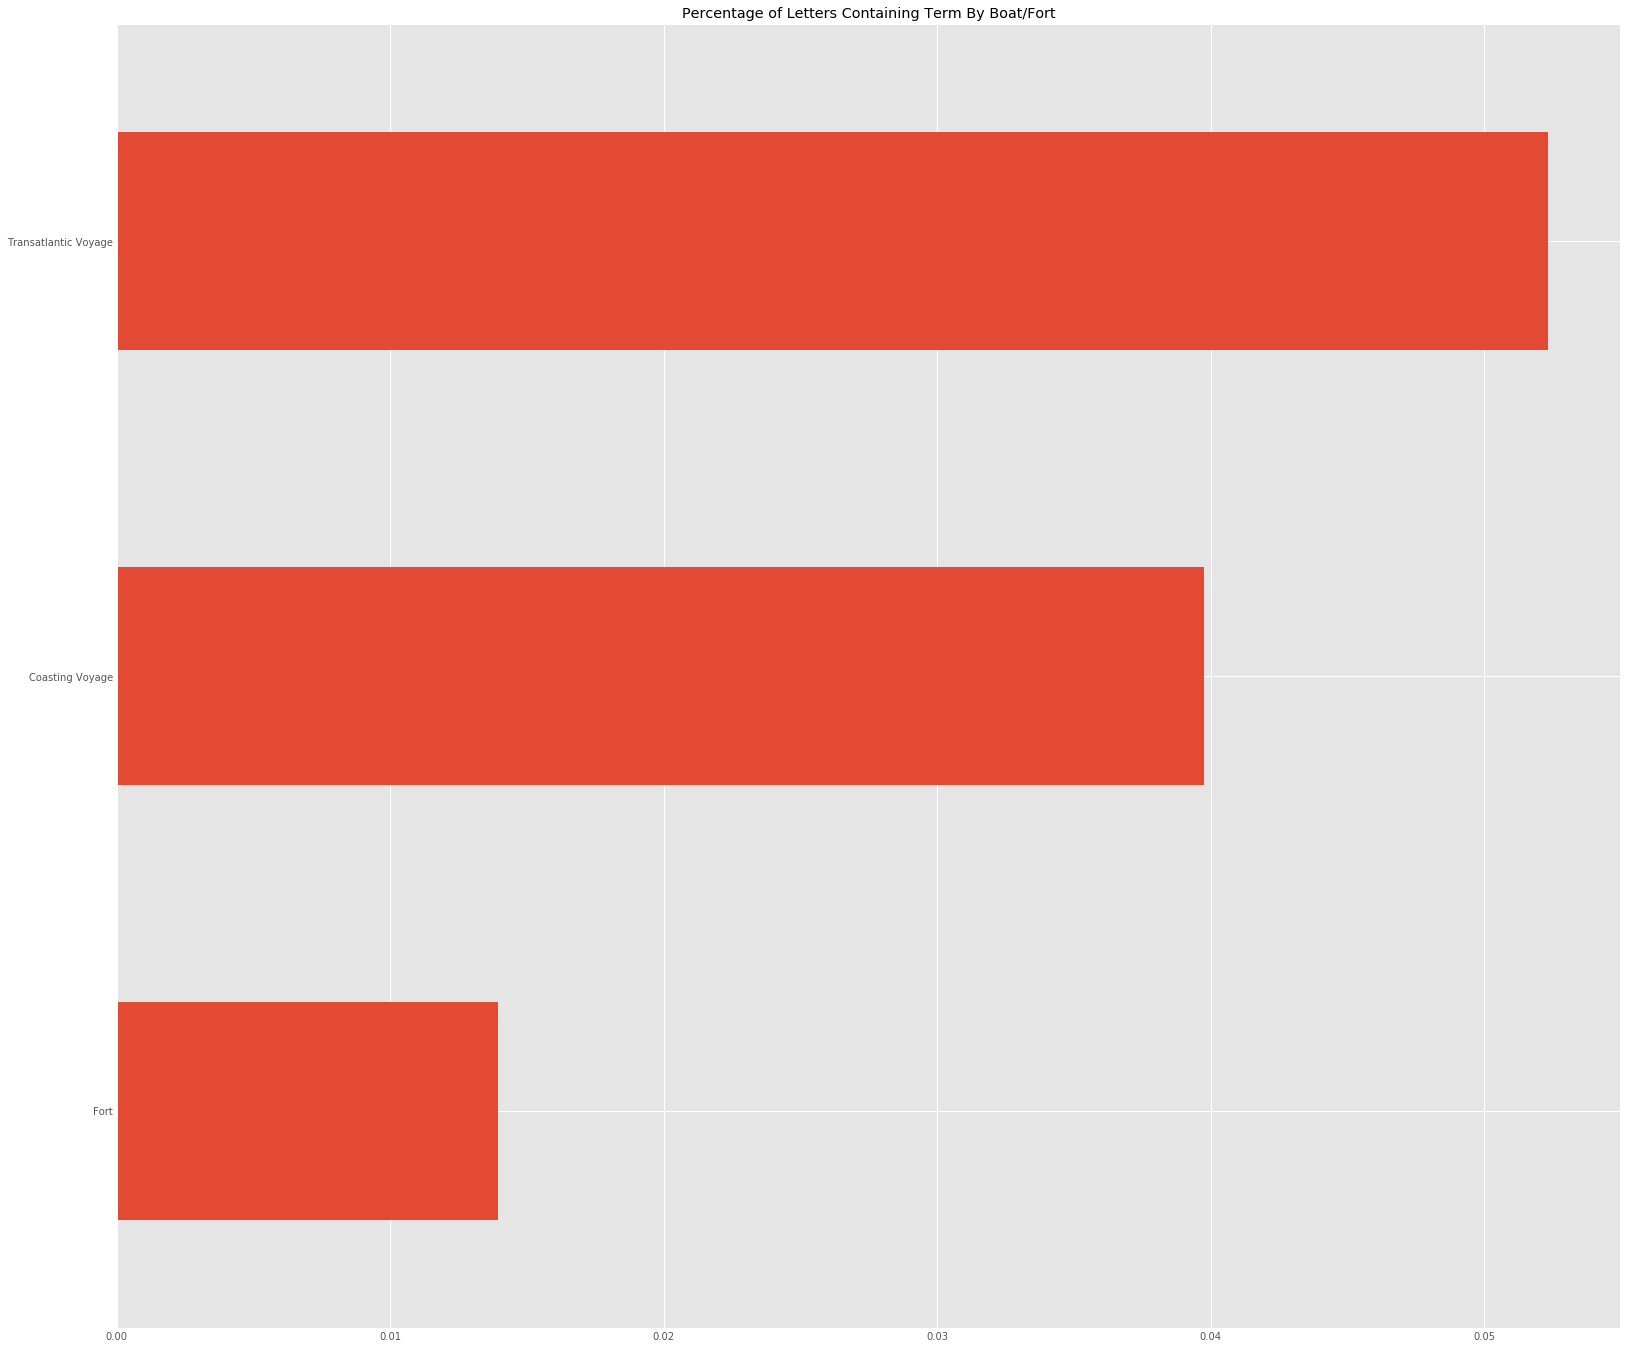

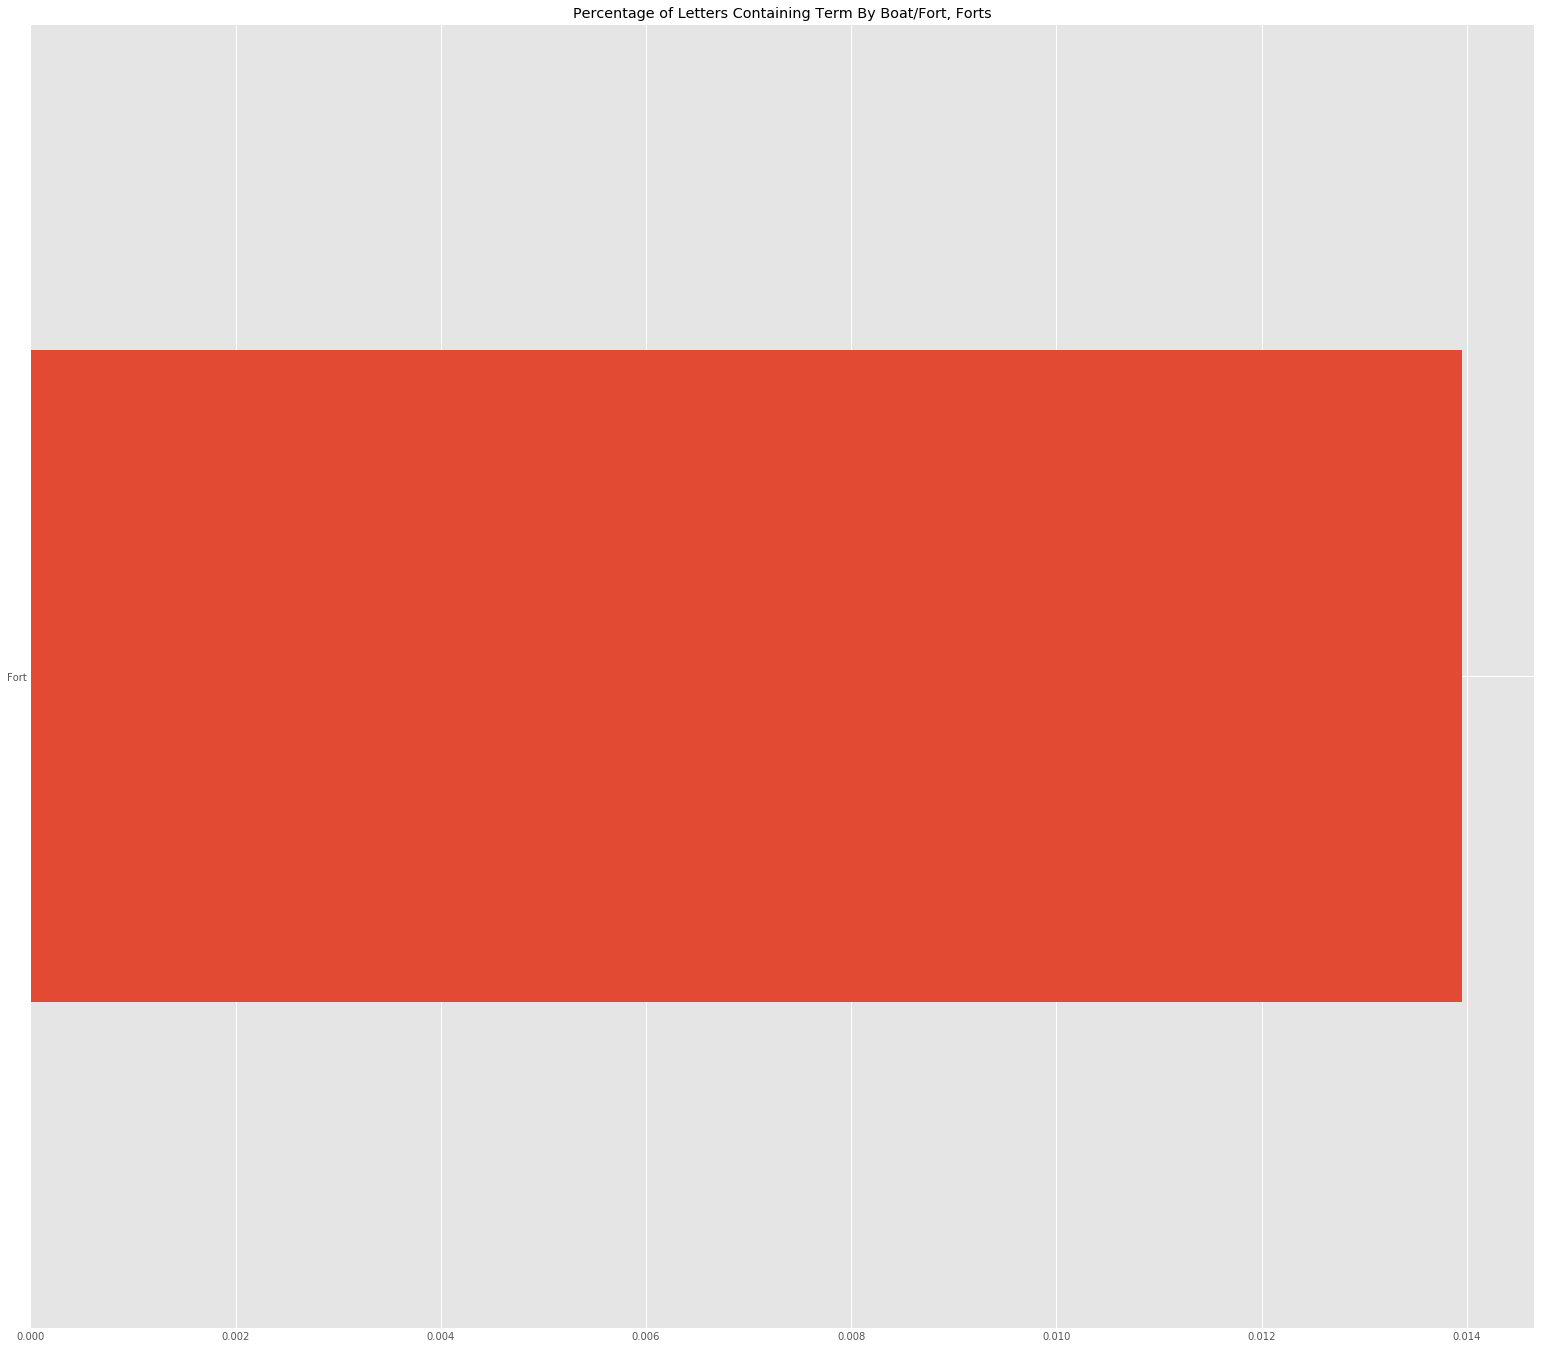

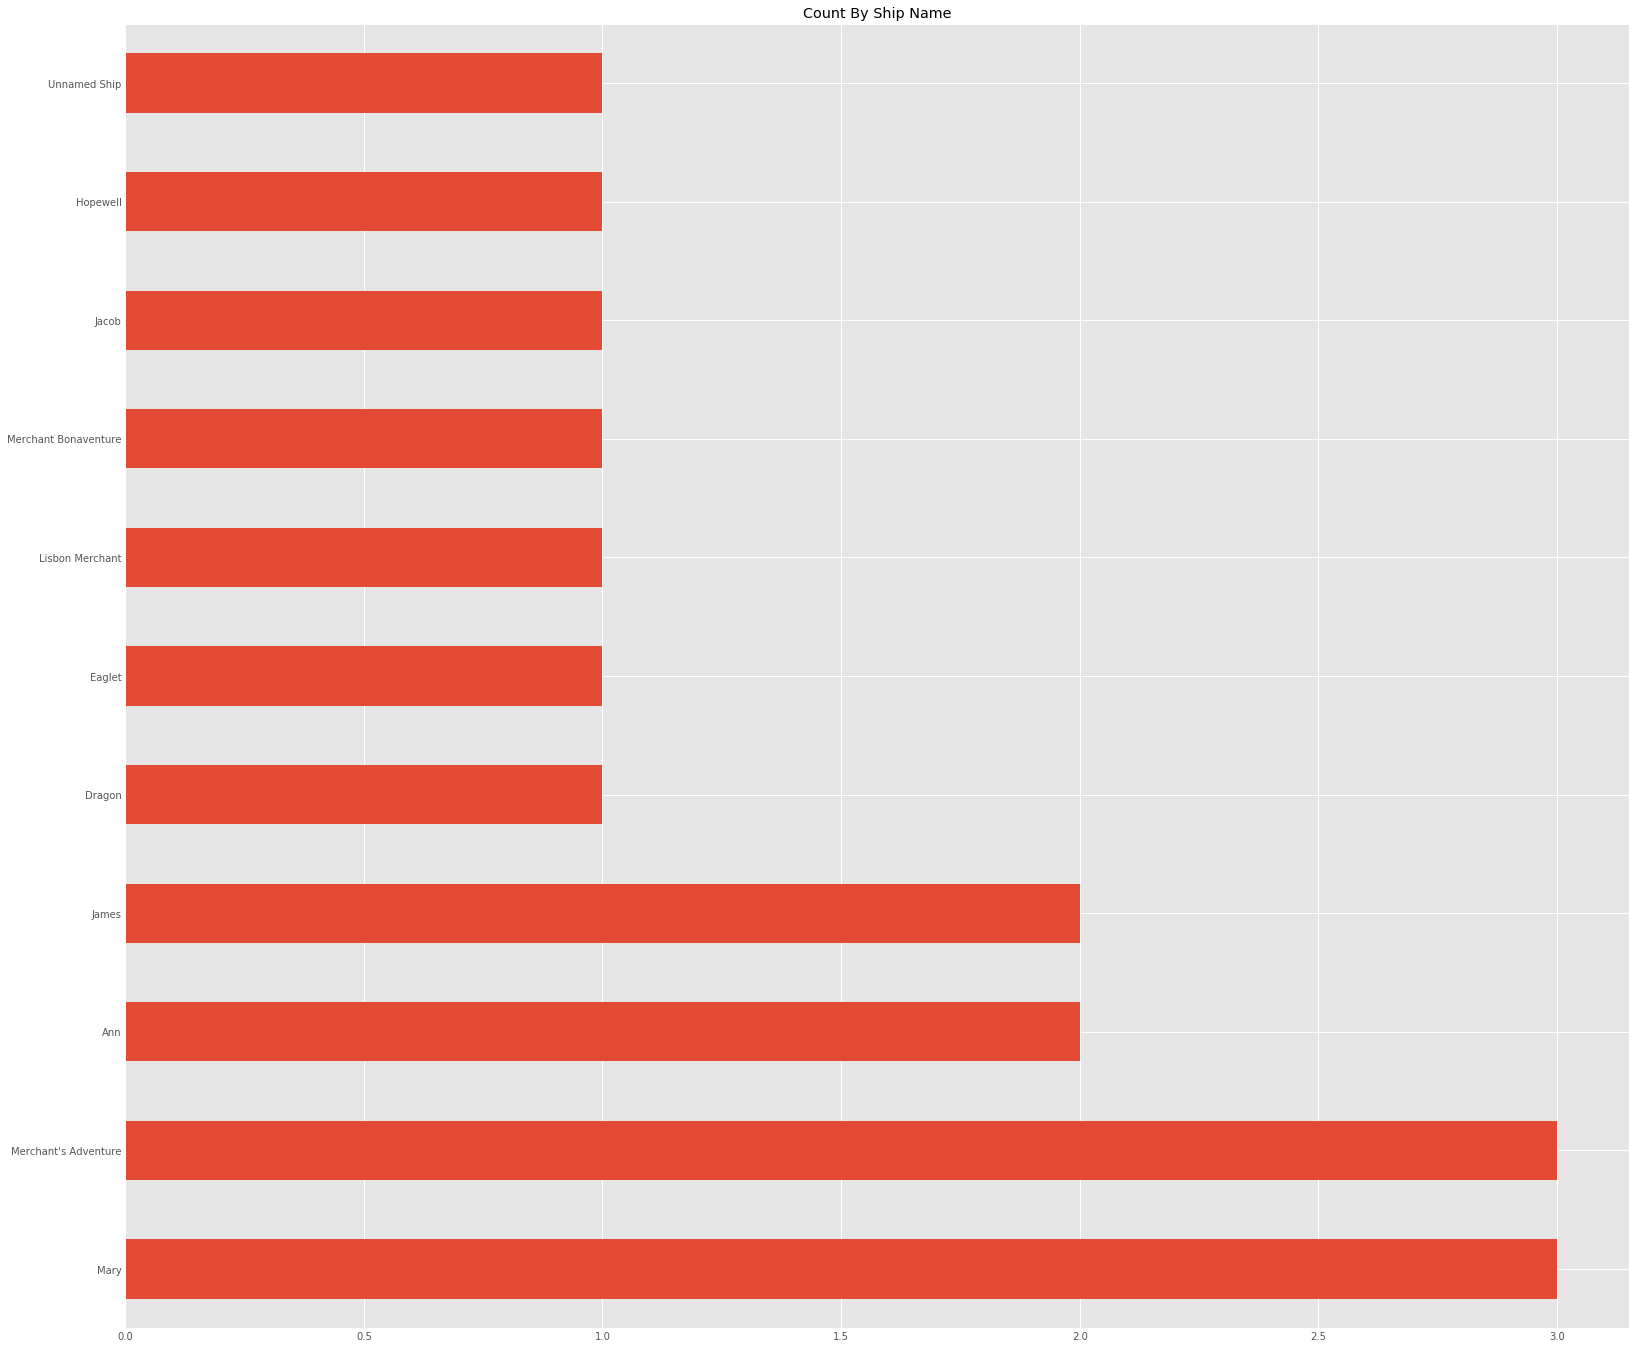

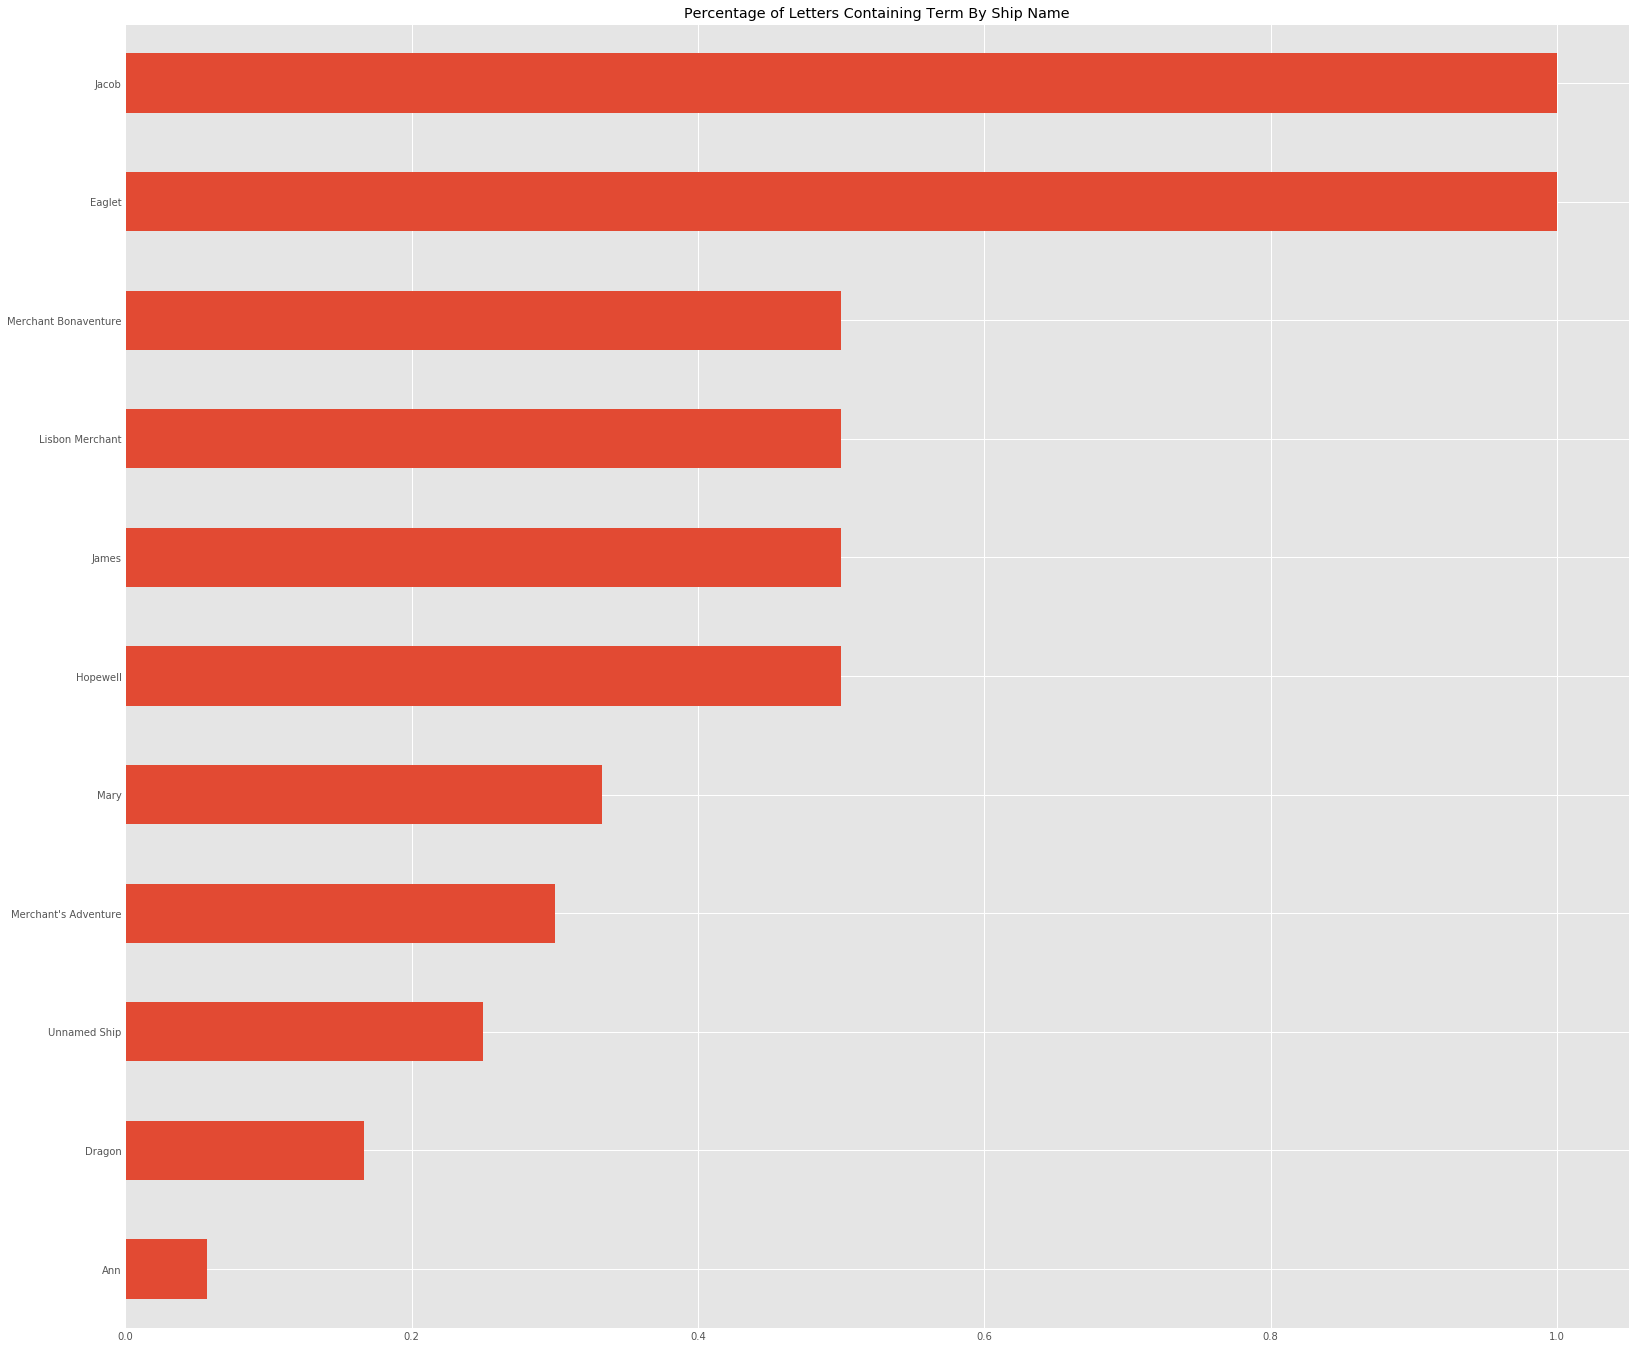

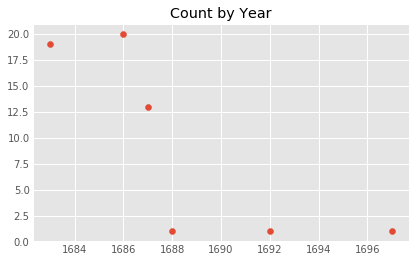

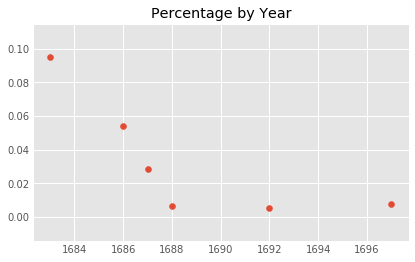

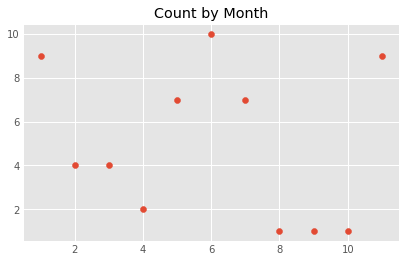

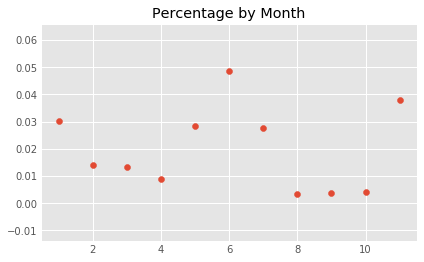

In [138]:
# Modify the terms within the brackets below to modify search. Terms need to be wrapped in parentheses and comma separated.
# The square brackets should be left unchanged.
terms = ['pirate', 'pirates']


# DO NOT CHANGE ANYTHING BELOW!!!
def return_terms_found(text, terms):
    for term in terms:
        if term in text.split(' '):
            return True
    
    return False

df['filtered'] = df['text_cleaned_dealiased'].apply(return_terms_found, args=(terms,))

df_subset = df[df['filtered'] == True]

print('Filtering for term:', terms, '({} total letters)'.format(len(df_subset)))

print('First 5 rows of filtered dataframe:')
display(df_subset.head())

print('UIDs of letters containing the term:')
print(df_subset['UID'].values)

for column in ['Place Sent From', 'Sender', 'Boat/Fort', 'Ship Name']:
    try:
        plt.figure(figsize=(24, 24))
        df_subset[column].value_counts().plot(kind='barh', title='Count By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    try:
        plt.figure(figsize=(24, 24))
        (df_subset[column].value_counts() / df[column].value_counts()).sort_values().dropna().plot(kind='barh', title='Percentage of Letters Containing Term By {}'.format(column))
    except:
        print('ERROR: All metadata for this column are null')
    if column != 'Ship Name':
        try:
            plt.figure(figsize=(24, 24))
            (df_subset[df_subset['Boat/Fort'] == 'Fort'][column].value_counts() / df[df['Boat/Fort'] == 'Fort'][column].value_counts())\
                .sort_values()\
                .dropna()\
                .plot(kind='barh', title='Percentage of Letters Containing Term By {}, Forts'.format(column))
        except:
            print('ERROR: Filtering for Fort')

plt.figure()
plt.title('Count by Year')
plt.scatter(df_subset.groupby('Year').count()['UID'].index, df_subset.groupby('Year').count()['UID'])

plt.figure()
plt.title('Percentage by Year')
plt.scatter((df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna().index, (df_subset.groupby('Year').count()['UID'] / df.groupby('Year').count()['UID']).dropna())


plt.figure()
plt.title('Count by Month')
plt.scatter(df_subset.groupby('Month').count()['UID'].index, df_subset.groupby('Month').count()['UID'])

plt.figure()
plt.title('Percentage by Month')
plt.scatter((df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna().index, (df_subset.groupby('Month').count()['UID'] / df.groupby('Month').count()['UID']).dropna())